In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

## Minimum Variance Portfolio Backtest.

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 225
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.MA.value(shrinkage_type="linear")

In [4]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [5]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:37<00:00,  7.60it/s]


StrategyStatistics:
* final_nav = 6.234281
* geom_avg_total_r = 0.101039
* geom_avg_xs_r = 0.072754
* std_xs_r = 0.232715
* min_xs_r = -0.120700
* max_xs_r = 0.099874
* skew = -0.285310
* kurtosis = 7.414857
* max_dd = -0.500251
* sharpe = 0.312633
* alpha_buy_hold = 0.023467
* tracking_error_buy_hold = 0.241516
* ir_buy_hold = 0.097167
* factor_loadings = {'low_risk': 0.37356389813760166, 'momentum': -0.09405536239811467, 'quality': 0.0069397426236319955, 'size': 0.01332739155465904, 'value': -0.233939964790837, 'spx': 0.5856661670907339}
* alpha_benchmark = 0.039518
* alpha_benchmark_pvalue = 0.224268
* tracking_error_benchmark = 0.208943
* ir_benchmark = 0.189134
* ttest_pval = 0.362953
* levene_pval = 0.000002
* timing_ability_coef = -0.005055
* timing_ability_pval = 0.881253

In [6]:
result.std_xs_r, result.sharpe

(0.23271482856433967, 0.3126331114823981)

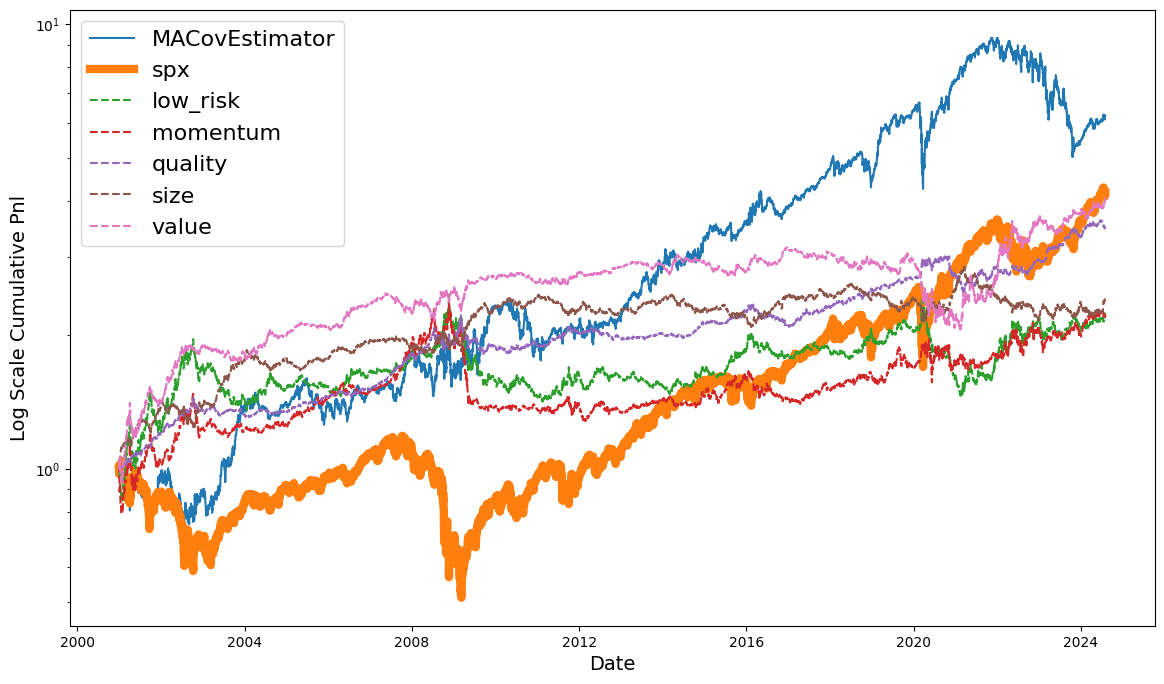

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

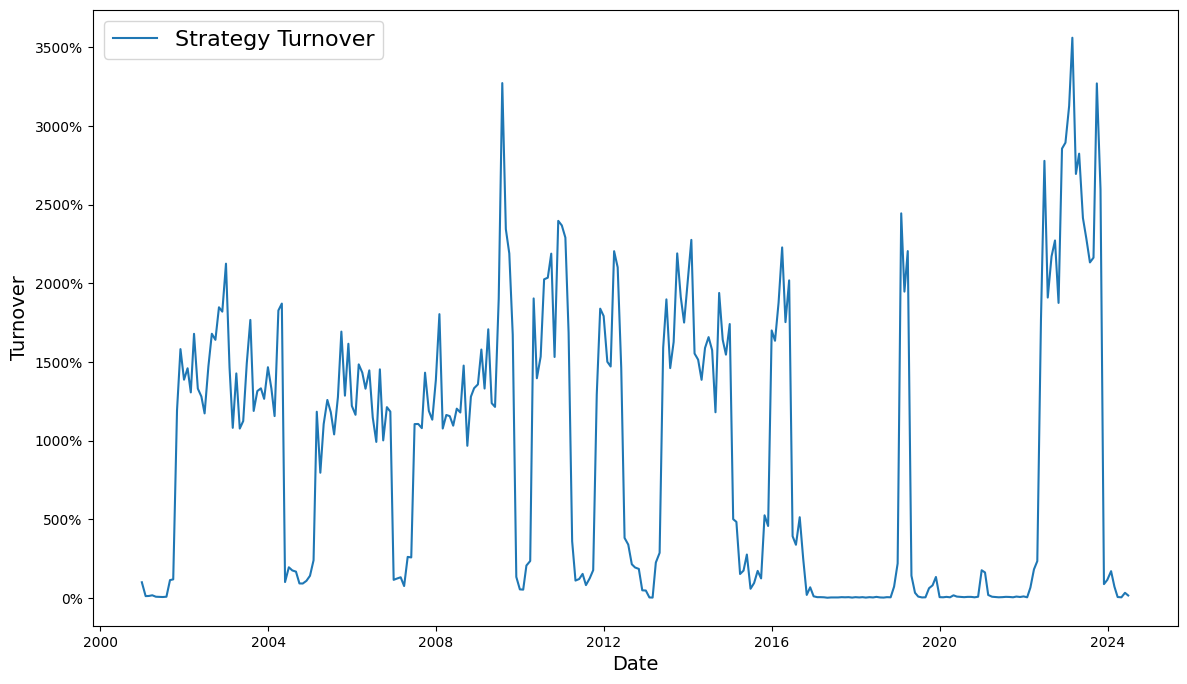

In [8]:
runner.plot_turnover()

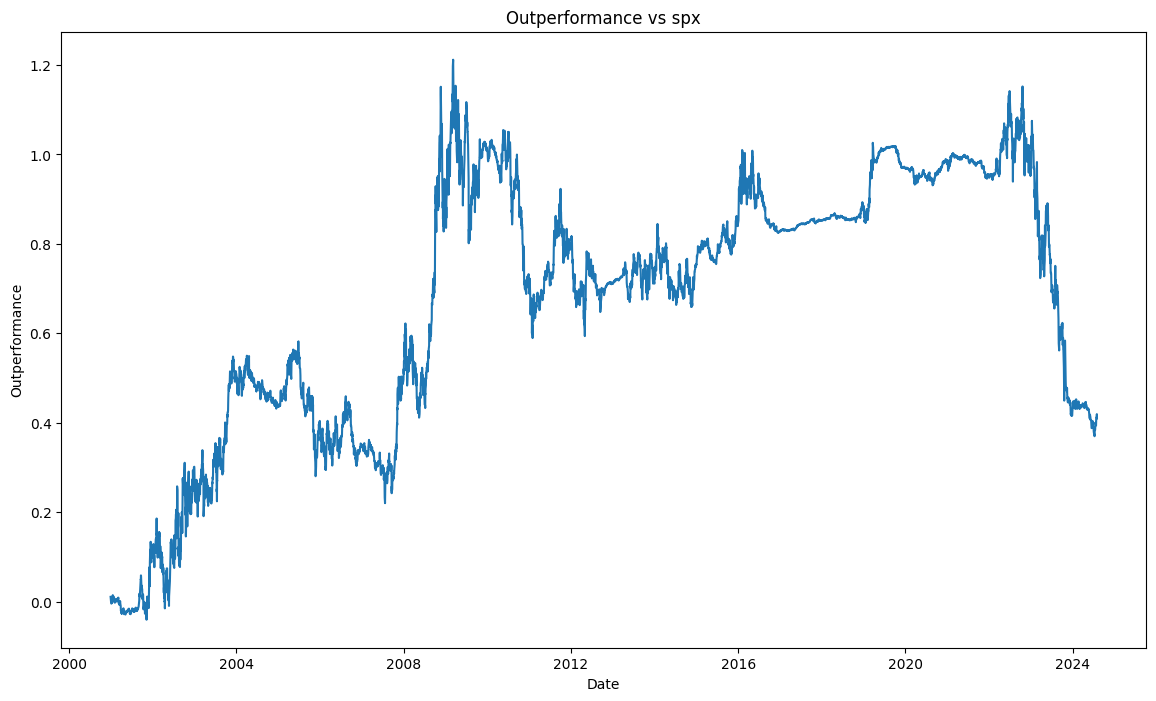

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")